In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
from cifar10_utils import load_cifar10, mean_std_normalization_per_pixels, cifar10_compile, show_accuracy
from BasicCNN_model import BasicCNN
from ResNet_model import ResNet
from GCNN_model import GResNet

Get train, test datasets
======

In [2]:
image_datas, label_datas = load_cifar10(path = 'cifardata/cifar-10-batches-py/')

train_datas = np.array(image_datas[:5]).reshape([-1,32,32,3])
train_labels = np.array(label_datas[:5]).reshape([-1])
test_datas = np.array(image_datas[5])
test_labels = np.array(label_datas[5])

print('train shape: ', train_datas.shape)
print('test shape: ',test_datas.shape)

train_datas, test_datas = mean_std_normalization_per_pixels(train_datas, test_datas, False)

image shape:  (6, 10000, 32, 32, 3)
label shape:  (6, 10000)
train shape:  (50000, 32, 32, 3)
test shape:  (10000, 32, 32, 3)


Model compile
======

BasicCNN

In [3]:
filter_num = 48
number_n = 0
weight_decay = 0.0005
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

global_step = tf.Variable(0, trainable=False)
lr = tf.train.exponential_decay(learning_rate = 1e-3,
                                global_step = global_step,
                                decay_steps = 1000,
                                decay_rate= 0.96,
                                staircase=True)

# global_step = tf.Variable(0, trainable=False)
# boundaries = [int(5000*num_classes/batch_size*30), int(5000*num_classes/batch_size*60), int(5000*num_classes/batch_size*90)]
# values = [0.02, 0.004, 0.0008, 0.00016]
# lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = BasicCNN(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filter_num=filter_num, dropout = False, res_initializer = None)

optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
# optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

W1129 15:41:31.372415 12028 deprecation_wrapper.py:119] From C:\Python\cifar_project\cifar-10\CIFAR10_pyfile_code\BasicCNN_model.py:27: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1129 15:41:31.378366 12028 deprecation_wrapper.py:119] From C:\Python\cifar_project\cifar-10\CIFAR10_pyfile_code\BasicCNN_model.py:46: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1129 15:41:31.379363 12028 deprecation_wrapper.py:119] From C:\Python\cifar_project\cifar-10\CIFAR10_pyfile_code\layers_and_blocks.py:37: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1129 15:41:31.380361 12028 deprecation.py:506] From C:\Python\cifar_project\cifar-10\CIFAR10_pyfile_code\layers_and_blocks.py:39: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dty

Training Model
=======

In [4]:
start_epoch = 0
end_epoch = 200
num_epochs = end_epoch-start_epoch

print('first learning rate:',sess.run(lr))
model_compile.train(start_epoch, end_epoch)
print('last learning rate:',sess.run(lr))

first learning rate: 0.001



Epoch: 1 Avg_cost: 1.8537809624671933
Test Accuracy:  0.6747000032663345
Train Accuracy:  0.6788000023365021



Epoch: 2 Avg_cost: 1.3796991618871677
Test Accuracy:  0.7410000020265579
Train Accuracy:  0.7602000004053115


KeyboardInterrupt: 

Saving model
=======

In [ ]:
import time
time_now = time.strftime('%Y_%m_%d_%H_%M', time.localtime(time.time()))
SAVER_DIR = 'model'
saver = tf.train.Saver()
checkpoint_path = os.path.join(SAVER_DIR, "BasicCNN_{}\BasicCNN_{}".format(time_now, time_now))
saver.save(sess, checkpoint_path)

Showing accuracy graph
======

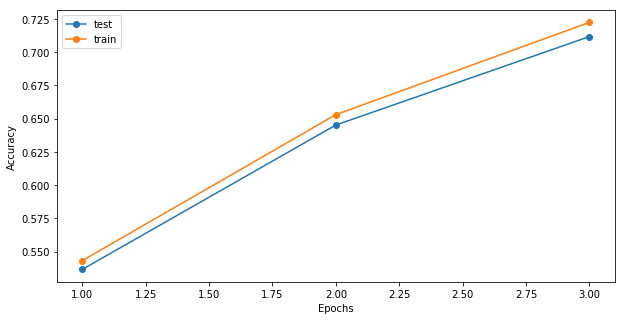

In [6]:
show_accuracy(num_epochs, model_compile.test_acc_list, model_compile.train_acc_list)

ResNet20

In [3]:
filter_num = 16
number_n = 3
weight_decay = 0.0001
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

# global_step = tf.Variable(0, trainable=False)
# lr = tf.train.exponential_decay(learning_rate = 1e-3,
#                                 global_step = global_step,
#                                 decay_steps = 1000,
#                                 decay_rate= 0.96,
#                                 staircase=True)

global_step = tf.Variable(0, trainable=False)
boundaries = [int(5000*num_classes/batch_size*60), int(5000*num_classes/batch_size*100), int(5000*num_classes/batch_size*130)]
values = [0.02, 0.004, 0.0008, 0.00016]
lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = ResNet(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filter_num=filter_num, dropout = False)

# optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

W1130 12:06:18.410066  9244 deprecation_wrapper.py:119] From C:\Python\cifar_project\cifar-10\CIFAR10_pyfile_code\ResNet_model.py:25: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1130 12:06:18.416047  9244 deprecation_wrapper.py:119] From C:\Python\cifar_project\cifar-10\CIFAR10_pyfile_code\ResNet_model.py:44: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1130 12:06:18.417041  9244 deprecation_wrapper.py:119] From C:\Python\cifar_project\cifar-10\CIFAR10_pyfile_code\layers_and_blocks.py:81: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1130 12:06:18.432010  9244 deprecation.py:506] From C:\Python\cifar_project\cifar-10\CIFAR10_pyfile_code\layers_and_blocks.py:39: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype a

In [4]:
start_epoch = 0
end_epoch = 150
num_epochs = end_epoch-start_epoch

print('first learning rate:',sess.run(lr))
model_compile.train(start_epoch, end_epoch)
print('last learning rate:',sess.run(lr))

first learning rate: 0.02



Epoch: 1 Avg_cost: 1.7313615326881429
Test Accuracy:  0.5289999955892563
Train Accuracy:  0.5418999966979027



Epoch: 2 Avg_cost: 1.2854754793643945
Test Accuracy:  0.6400999999046326
Train Accuracy:  0.6530000019073486



Epoch: 3 Avg_cost: 1.0890043590068819
Test Accuracy:  0.6927999985218048
Train Accuracy:  0.6970999997854233



Epoch: 4 Avg_cost: 0.968320765972137
Test Accuracy:  0.7163000047206879
Train Accuracy:  0.7331000006198883



Epoch: 5 Avg_cost: 0.8739832018613813
Test Accuracy:  0.7449000006914139
Train Accuracy:  0.7612999981641769



Epoch: 6 Avg_cost: 0.8155474042892449
Test Accuracy:  0.7687999993562699
Train Accuracy:  0.7799999964237213


KeyboardInterrupt: 

Training Model
=======

In [4]:
start_epoch = 0
end_epoch = 150
num_epochs = end_epoch-start_epoch

print('first learning rate:',sess.run(lr))
model_compile.train(start_epoch, end_epoch)
print('last learning rate:',sess.run(lr))

first learning rate: 0.02



Epoch: 1 Avg_cost: 1.7128889520168311
Test Accuracy:  0.5312999984622002
Train Accuracy:  0.5387999972701073



Epoch: 2 Avg_cost: 1.2707310014963162
Test Accuracy:  0.6383000016212463
Train Accuracy:  0.6478000003099441



Epoch: 3 Avg_cost: 1.066161207318306
Test Accuracy:  0.7037000012397766
Train Accuracy:  0.7012000048160553



Epoch: 4 Avg_cost: 0.9291290985345829
Test Accuracy:  0.7376999998092652
Train Accuracy:  0.7521999973058701



Epoch: 5 Avg_cost: 0.8368759804964062
Test Accuracy:  0.7507999992370605
Train Accuracy:  0.7728999984264374



Epoch: 6 Avg_cost: 0.7704621842503544
Test Accuracy:  0.7798999989032745
Train Accuracy:  0.7976999968290329



Epoch: 7 Avg_cost: 0.7126425681710238
Test Accuracy:  0.7868999940156937
Train Accuracy:  0.8122999972105026



Epoch: 8 Avg_cost: 0.6787942233085633
Test Accuracy:  0.8011999994516372
Train Accuracy:  0.8243999993801117



Epoch: 9 Avg_cost: 0.6497975839972494
Test Accuracy:  0.8067999958992005
Train Accuracy:  0.8302999961376191



Epoch: 10 Avg_cost: 0.6194911690354353
Test Accuracy:  0.8133999979496003
Train Accuracy:  0.8336999988555909



Epoch: 11 Avg_cost: 0.595232369184494
Test Accuracy:  0.8193999993801117
Train Accuracy:  0.8427999991178513



Epoch: 12 Avg_cost: 0.5787916126847265
Test Accuracy:  0.8227999979257583
Train Accuracy:  0.8585999995470047



Epoch: 13 Avg_cost: 0.5598328116536142
Test Accuracy:  0.8312999963760376
Train Accuracy:  0.8730999994277954



Epoch: 14 Avg_cost: 0.5388601480722429
Test Accuracy:  0.835699999332428
Train Accuracy:  0.8666000038385391



Epoch: 15 Avg_cost: 0.526483931660652
Test Accuracy:  0.8392999976873398
Train Accuracy:  0.8803999972343445



Epoch: 16 Avg_cost: 0.508948550760746
Test Accuracy:  0.8365999984741211
Train Accuracy:  0.8748000007867813



Epoch: 17 Avg_cost: 0.5046214997172357
Test Accuracy:  0.8405999994277954
Train Accuracy:  0.8752000010013581



Epoch: 18 Avg_cost: 0.4821328635811809
Test Accuracy:  0.8466999989748001
Train Accuracy:  0.8819000005722046



Epoch: 19 Avg_cost: 0.4812582438588141
Test Accuracy:  0.8510000032186508
Train Accuracy:  0.8962000006437302



Epoch: 20 Avg_cost: 0.46834390711784335
Test Accuracy:  0.8521999990940095
Train Accuracy:  0.8891000014543533



Epoch: 21 Avg_cost: 0.4572189134359365
Test Accuracy:  0.8503999996185303
Train Accuracy:  0.8944000023603439



Epoch: 22 Avg_cost: 0.45255031889677055
Test Accuracy:  0.8578000009059906
Train Accuracy:  0.8974000030755996



Epoch: 23 Avg_cost: 0.4380314773619175
Test Accuracy:  0.8580999988317489
Train Accuracy:  0.901200001835823



Epoch: 24 Avg_cost: 0.4366097497344017
Test Accuracy:  0.8520999991893768
Train Accuracy:  0.8998000013828278



Epoch: 25 Avg_cost: 0.4262277017533779
Test Accuracy:  0.8562000000476837
Train Accuracy:  0.9040000003576278



Epoch: 26 Avg_cost: 0.4225739829838273
Test Accuracy:  0.8613999980688095
Train Accuracy:  0.9079000014066696



Epoch: 27 Avg_cost: 0.41638394132256523
Test Accuracy:  0.8666999971866608
Train Accuracy:  0.9105000007152557



Epoch: 28 Avg_cost: 0.4067606048882006
Test Accuracy:  0.8628999996185303
Train Accuracy:  0.9086000037193298



Epoch: 29 Avg_cost: 0.40355905318260216
Test Accuracy:  0.8651999980211258
Train Accuracy:  0.9222000014781951



Epoch: 30 Avg_cost: 0.3999472208917134
Test Accuracy:  0.8618999963998795
Train Accuracy:  0.9132000035047532



Epoch: 31 Avg_cost: 0.39819684991240506
Test Accuracy:  0.8616000002622605
Train Accuracy:  0.9123000025749206



Epoch: 32 Avg_cost: 0.39022170537710177
Test Accuracy:  0.8697999995946885
Train Accuracy:  0.9197000020742416



Epoch: 33 Avg_cost: 0.38528368383645994
Test Accuracy:  0.8709000015258789
Train Accuracy:  0.9172000002861023



Epoch: 34 Avg_cost: 0.3813643222749231
Test Accuracy:  0.8707000029087066
Train Accuracy:  0.9190000003576279



Epoch: 35 Avg_cost: 0.37200096824765166
Test Accuracy:  0.8717000007629394
Train Accuracy:  0.9283000016212464



Epoch: 36 Avg_cost: 0.3694568301737311
Test Accuracy:  0.8726000010967254
Train Accuracy:  0.927600000500679



Epoch: 37 Avg_cost: 0.36687327703833583
Test Accuracy:  0.8723999989032746
Train Accuracy:  0.9247000050544739



Epoch: 38 Avg_cost: 0.36668502244353274
Test Accuracy:  0.8709000009298324
Train Accuracy:  0.9270999997854232



Epoch: 39 Avg_cost: 0.35585810843110083
Test Accuracy:  0.8686999958753586
Train Accuracy:  0.9299000024795532



Epoch: 40 Avg_cost: 0.35328273630142204
Test Accuracy:  0.8743000000715255
Train Accuracy:  0.9295000034570694



Epoch: 41 Avg_cost: 0.3539134046137333
Test Accuracy:  0.8760999989509582
Train Accuracy:  0.9365000003576278



Epoch: 42 Avg_cost: 0.35052580273151396
Test Accuracy:  0.8793999987840653
Train Accuracy:  0.9354000008106231



Epoch: 43 Avg_cost: 0.3414914343357081
Test Accuracy:  0.8788000005483627
Train Accuracy:  0.9319000047445297



Epoch: 44 Avg_cost: 0.3375265803635119
Test Accuracy:  0.8724000000953674
Train Accuracy:  0.9360999995470047



Epoch: 45 Avg_cost: 0.3366357510983943
Test Accuracy:  0.879300000667572
Train Accuracy:  0.9376000010967255



Epoch: 46 Avg_cost: 0.3329553957283498
Test Accuracy:  0.8795000004768372
Train Accuracy:  0.9421000021696091



Epoch: 47 Avg_cost: 0.33110958084464076
Test Accuracy:  0.875799999833107
Train Accuracy:  0.9338000029325485



Epoch: 48 Avg_cost: 0.33227090746164295
Test Accuracy:  0.8865000009536743
Train Accuracy:  0.9431999993324279



Epoch: 49 Avg_cost: 0.32779788485169403
Test Accuracy:  0.8764999997615814
Train Accuracy:  0.9324000024795532



Epoch: 50 Avg_cost: 0.32712505802512193
Test Accuracy:  0.876700000166893
Train Accuracy:  0.9374000012874604



Epoch: 51 Avg_cost: 0.3257344614863398
Test Accuracy:  0.8785000020265579
Train Accuracy:  0.9502000021934509



Epoch: 52 Avg_cost: 0.31541478210687623
Test Accuracy:  0.8849000024795532
Train Accuracy:  0.9423999983072281



Epoch: 53 Avg_cost: 0.32152606952190416
Test Accuracy:  0.8790999990701676
Train Accuracy:  0.9415000015497208



Epoch: 54 Avg_cost: 0.31521162146329873
Test Accuracy:  0.8843000024557114
Train Accuracy:  0.945400002002716



Epoch: 55 Avg_cost: 0.3133613037765028
Test Accuracy:  0.8895999991893768
Train Accuracy:  0.9465000003576278



Epoch: 56 Avg_cost: 0.31564416214823743
Test Accuracy:  0.8788000011444091
Train Accuracy:  0.9443000018596649



Epoch: 57 Avg_cost: 0.31204442331194854
Test Accuracy:  0.8878000020980835
Train Accuracy:  0.9492000019550324



Epoch: 58 Avg_cost: 0.30910058054327955
Test Accuracy:  0.8808000010251998
Train Accuracy:  0.9493000024557113



Epoch: 59 Avg_cost: 0.30845618537068414
Test Accuracy:  0.8868000000715256
Train Accuracy:  0.9541000014543534



Epoch: 60 Avg_cost: 0.30488962325453745
Test Accuracy:  0.8842000019550323
Train Accuracy:  0.9469000017642974



Epoch: 61 Avg_cost: 0.24546369141340244
Test Accuracy:  0.901900002360344
Train Accuracy:  0.9698000067472458



Epoch: 62 Avg_cost: 0.22793415820598598
Test Accuracy:  0.9022000014781952
Train Accuracy:  0.9734000104665756



Epoch: 63 Avg_cost: 0.22168526479601852
Test Accuracy:  0.9008000010251999
Train Accuracy:  0.9737000089883804



Epoch: 64 Avg_cost: 0.21671945375204094
Test Accuracy:  0.901500004529953
Train Accuracy:  0.970200007557869



Epoch: 65 Avg_cost: 0.21346424311399478
Test Accuracy:  0.9009000009298325
Train Accuracy:  0.9745000106096268



Epoch: 66 Avg_cost: 0.2086399680376053
Test Accuracy:  0.9004000037908554
Train Accuracy:  0.976400010585785



Epoch: 67 Avg_cost: 0.20521374952793114
Test Accuracy:  0.9034000027179718
Train Accuracy:  0.9788000112771988



Epoch: 68 Avg_cost: 0.2046298506110908
Test Accuracy:  0.8994000029563903
Train Accuracy:  0.9766000115871429



Epoch: 69 Avg_cost: 0.20278159284591704
Test Accuracy:  0.8989000016450882
Train Accuracy:  0.9786000061035156



Epoch: 70 Avg_cost: 0.19855158585309984
Test Accuracy:  0.8998000007867814
Train Accuracy:  0.9787000101804734



Epoch: 71 Avg_cost: 0.19631918860971917
Test Accuracy:  0.9028000044822693
Train Accuracy:  0.9784000092744827



Epoch: 72 Avg_cost: 0.1980828679800034
Test Accuracy:  0.9036000007390976
Train Accuracy:  0.9805000096559524



Epoch: 73 Avg_cost: 0.19252876944839947
Test Accuracy:  0.9009000015258789
Train Accuracy:  0.9815000110864639



Epoch: 74 Avg_cost: 0.19247392721474163
Test Accuracy:  0.9025999999046326
Train Accuracy:  0.9829000097513199



Epoch: 75 Avg_cost: 0.19330546103417862
Test Accuracy:  0.9007000011205674
Train Accuracy:  0.980000011920929



Epoch: 76 Avg_cost: 0.19087464250624192
Test Accuracy:  0.9011000007390976
Train Accuracy:  0.979800009727478



Epoch: 77 Avg_cost: 0.1903559758216143
Test Accuracy:  0.9032000011205673
Train Accuracy:  0.983300010561943



Epoch: 78 Avg_cost: 0.18572237554192525
Test Accuracy:  0.9026000016927719
Train Accuracy:  0.9837000113725662



Epoch: 79 Avg_cost: 0.18491610214114199
Test Accuracy:  0.9007000011205674
Train Accuracy:  0.9847000110149383



Epoch: 80 Avg_cost: 0.1835753147453068
Test Accuracy:  0.9011999994516373
Train Accuracy:  0.9839000123739242



Epoch: 81 Avg_cost: 0.1794396217912435
Test Accuracy:  0.9023999989032745
Train Accuracy:  0.9846000105142594



Epoch: 82 Avg_cost: 0.18194301636517032
Test Accuracy:  0.8998000025749207
Train Accuracy:  0.9838000100851059



Epoch: 83 Avg_cost: 0.1816661702692508
Test Accuracy:  0.898500000834465
Train Accuracy:  0.9854000127315521



Epoch: 84 Avg_cost: 0.18321565338969234
Test Accuracy:  0.8977999997138977
Train Accuracy:  0.9799000102281571



Epoch: 85 Avg_cost: 0.1790583698302507
Test Accuracy:  0.9006000024080276
Train Accuracy:  0.9822000116109848



Epoch: 86 Avg_cost: 0.177289584070444
Test Accuracy:  0.9024000018835068
Train Accuracy:  0.9831000107526779



Epoch: 87 Avg_cost: 0.17622430987656104
Test Accuracy:  0.901599999666214
Train Accuracy:  0.9864000111818314



Epoch: 88 Avg_cost: 0.1757280708700419
Test Accuracy:  0.9009000027179718
Train Accuracy:  0.9856000101566315



Epoch: 89 Avg_cost: 0.174290803179145
Test Accuracy:  0.8986000007390976
Train Accuracy:  0.9831000089645385



Epoch: 90 Avg_cost: 0.17470173148810872
Test Accuracy:  0.9022000002861023
Train Accuracy:  0.9862000107765198



Epoch: 91 Avg_cost: 0.17725529088079928
Test Accuracy:  0.9042000001668931
Train Accuracy:  0.9857000112533569



Epoch: 92 Avg_cost: 0.1680670783668757
Test Accuracy:  0.9011000019311904
Train Accuracy:  0.9874000096321106



Epoch: 93 Avg_cost: 0.17191087655723106
Test Accuracy:  0.9018000000715256
Train Accuracy:  0.9866000086069107



Epoch: 94 Avg_cost: 0.1720333885848523
Test Accuracy:  0.8991000014543533
Train Accuracy:  0.984800009727478



Epoch: 95 Avg_cost: 0.16781661687791358
Test Accuracy:  0.9023000001907349
Train Accuracy:  0.9867000102996826



Epoch: 96 Avg_cost: 0.16790907587110987
Test Accuracy:  0.9004999965429306
Train Accuracy:  0.9864000105857849



Epoch: 97 Avg_cost: 0.1700768081843853
Test Accuracy:  0.8996000009775161
Train Accuracy:  0.9875000095367432



Epoch: 98 Avg_cost: 0.1681179307848216
Test Accuracy:  0.9011000001430511
Train Accuracy:  0.989700009226799



Epoch: 99 Avg_cost: 0.16667882053554067
Test Accuracy:  0.901200001835823
Train Accuracy:  0.9877000099420548



Epoch: 100 Avg_cost: 0.1664456021934748
Test Accuracy:  0.9021000009775162
Train Accuracy:  0.987300009727478



Epoch: 101 Avg_cost: 0.1572404660433532
Test Accuracy:  0.9031000006198883
Train Accuracy:  0.9914000076055527



Epoch: 102 Avg_cost: 0.14866138085722927
Test Accuracy:  0.9038999986648559
Train Accuracy:  0.9915000069141388



Epoch: 103 Avg_cost: 0.1493901509195566
Test Accuracy:  0.9040000009536743
Train Accuracy:  0.9909000086784363



Epoch: 104 Avg_cost: 0.14935297074913978
Test Accuracy:  0.9042999988794327
Train Accuracy:  0.992600005865097



Epoch: 105 Avg_cost: 0.1467855051308871
Test Accuracy:  0.9054000020027161
Train Accuracy:  0.9928000056743622



Epoch: 106 Avg_cost: 0.14495433783531197
Test Accuracy:  0.9042000007629395
Train Accuracy:  0.9904000091552735



Epoch: 107 Avg_cost: 0.14408783876895898
Test Accuracy:  0.9039999997615814
Train Accuracy:  0.9906000077724457



Epoch: 108 Avg_cost: 0.14391548216342936
Test Accuracy:  0.9045000010728836
Train Accuracy:  0.9916000074148178



Epoch: 109 Avg_cost: 0.14538610367476942
Test Accuracy:  0.9032000011205673
Train Accuracy:  0.991900007724762



Epoch: 110 Avg_cost: 0.1435244562029839
Test Accuracy:  0.904099999666214
Train Accuracy:  0.9913000059127808



Epoch: 111 Avg_cost: 0.1459207536429167
Test Accuracy:  0.9049000012874603
Train Accuracy:  0.9930000066757202



Epoch: 112 Avg_cost: 0.14391073270142068
Test Accuracy:  0.9041999989748001
Train Accuracy:  0.9923000073432923



Epoch: 113 Avg_cost: 0.1436195774376393
Test Accuracy:  0.9051999986171723
Train Accuracy:  0.9923000067472458



Epoch: 114 Avg_cost: 0.14224178743362428
Test Accuracy:  0.9041000002622605
Train Accuracy:  0.99260000705719



Epoch: 115 Avg_cost: 0.14155854776501658
Test Accuracy:  0.9051000005006791
Train Accuracy:  0.9929000055789947



Epoch: 116 Avg_cost: 0.14160371626913545
Test Accuracy:  0.9051000028848648
Train Accuracy:  0.9917000079154968



Epoch: 117 Avg_cost: 0.13960890342295168
Test Accuracy:  0.9052000004053116
Train Accuracy:  0.9934000062942505



Epoch: 118 Avg_cost: 0.14029942089319228
Test Accuracy:  0.9055000019073486
Train Accuracy:  0.9917000073194504



Epoch: 119 Avg_cost: 0.1421179258972407
Test Accuracy:  0.9056000018119812
Train Accuracy:  0.9932000064849853



Epoch: 120 Avg_cost: 0.13966143365204334
Test Accuracy:  0.9036000007390976
Train Accuracy:  0.9941000056266784



Epoch: 121 Avg_cost: 0.140557911425829
Test Accuracy:  0.9038000011444092
Train Accuracy:  0.9932000064849853



Epoch: 122 Avg_cost: 0.14071922473609438
Test Accuracy:  0.9046000015735626
Train Accuracy:  0.9922000068426132



Epoch: 123 Avg_cost: 0.13869557978212818
Test Accuracy:  0.9033000028133392
Train Accuracy:  0.9923000067472458



Epoch: 124 Avg_cost: 0.14048206953704365
Test Accuracy:  0.9039000028371811
Train Accuracy:  0.9920000076293946



Epoch: 125 Avg_cost: 0.14152336944639676
Test Accuracy:  0.9040000015497207
Train Accuracy:  0.9931000065803528



Epoch: 126 Avg_cost: 0.14024476382136342
Test Accuracy:  0.9035999989509582
Train Accuracy:  0.9925000071525574



Epoch: 127 Avg_cost: 0.13819098185002818
Test Accuracy:  0.9040000003576278
Train Accuracy:  0.9936000055074692



Epoch: 128 Avg_cost: 0.13903576923906794
Test Accuracy:  0.9053999996185302
Train Accuracy:  0.9940000051259994



Epoch: 129 Avg_cost: 0.1387775198072195
Test Accuracy:  0.905699999332428
Train Accuracy:  0.993500006198883



Epoch: 130 Avg_cost: 0.13850111788511277
Test Accuracy:  0.9071000021696091
Train Accuracy:  0.9937000060081482



Epoch: 131 Avg_cost: 0.13739933089911938
Test Accuracy:  0.9063000017404557
Train Accuracy:  0.993500006198883



Epoch: 132 Avg_cost: 0.1357508986890316
Test Accuracy:  0.906700000166893
Train Accuracy:  0.9938000059127807



Epoch: 133 Avg_cost: 0.1352739025503397
Test Accuracy:  0.9060999995470047
Train Accuracy:  0.9938000059127807



Epoch: 134 Avg_cost: 0.1368546561449766
Test Accuracy:  0.905799999833107
Train Accuracy:  0.9924000072479248



Epoch: 135 Avg_cost: 0.13532337431609637
Test Accuracy:  0.9059000015258789
Train Accuracy:  0.9947000050544739



Epoch: 136 Avg_cost: 0.13671273742616177
Test Accuracy:  0.906000002026558
Train Accuracy:  0.9947000044584274



Epoch: 137 Avg_cost: 0.1340566251724958
Test Accuracy:  0.9051999998092651
Train Accuracy:  0.9941000056266784



Epoch: 138 Avg_cost: 0.13490935862064352
Test Accuracy:  0.904300001859665
Train Accuracy:  0.9951000046730042



Epoch: 139 Avg_cost: 0.13493419198691853
Test Accuracy:  0.9052000015974044
Train Accuracy:  0.9945000052452088



Epoch: 140 Avg_cost: 0.13516687922179696
Test Accuracy:  0.906000002026558
Train Accuracy:  0.9945000052452088



Epoch: 141 Avg_cost: 0.13573277151584626
Test Accuracy:  0.9062000012397766
Train Accuracy:  0.9936000061035156



Epoch: 142 Avg_cost: 0.13543989232182496
Test Accuracy:  0.906000002026558
Train Accuracy:  0.9943000048398971



Epoch: 143 Avg_cost: 0.13496085597574706
Test Accuracy:  0.9058000010251999
Train Accuracy:  0.9936000061035156



Epoch: 144 Avg_cost: 0.13412156735360625
Test Accuracy:  0.9054000014066697
Train Accuracy:  0.9952000045776367



Epoch: 145 Avg_cost: 0.13516395215690144
Test Accuracy:  0.9054000002145767
Train Accuracy:  0.9937000060081482



Epoch: 146 Avg_cost: 0.1346540154218673
Test Accuracy:  0.9057999992370606
Train Accuracy:  0.9951000046730042



Epoch: 147 Avg_cost: 0.13302260006964214
Test Accuracy:  0.9052000004053116
Train Accuracy:  0.9937000048160552



Epoch: 148 Avg_cost: 0.13394629865884786
Test Accuracy:  0.9052000004053116
Train Accuracy:  0.9944000053405762



Epoch: 149 Avg_cost: 0.13659452824294566
Test Accuracy:  0.9052999985218048
Train Accuracy:  0.9945000052452088



Epoch: 150 Avg_cost: 0.13378038562834266
Test Accuracy:  0.9056999999284744
Train Accuracy:  0.9946000051498413
150 epoch done
last learning rate: 0.00016


Saving model
=======

In [ ]:
import time
import os
time_now = time.strftime('%Y_%m_%d_%H_%M', time.localtime(time.time()))
SAVER_DIR = 'model'
saver = tf.train.Saver()
checkpoint_path = os.path.join(SAVER_DIR, "ResNet20_{}\ResNet20_{}".format(time_now, time_now))
saver.save(sess, checkpoint_path)

Showing accuracy graph
======

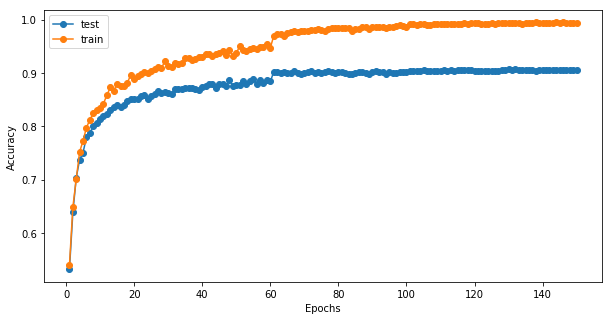

In [5]:
show_accuracy(num_epochs, model_compile.test_acc_list, model_compile.train_acc_list)

ResNet32

In [ ]:
filter_num = 16
number_n = 5
weight_decay = 0.0005
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

# global_step = tf.Variable(0, trainable=False)
# lr = tf.train.exponential_decay(learning_rate = 1e-3,
#                                 global_step = global_step,
#                                 decay_steps = 1000,
#                                 decay_rate= 0.96,
#                                 staircase=True)

global_step = tf.Variable(0, trainable=False)
boundaries = [int(5000*num_classes/batch_size*60), int(5000*num_classes/batch_size*120), int(5000*num_classes/batch_size*160)]
values = [0.1, 0.01, 0.001, 0.0001]
lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = ResNet(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filter_num=filter_num, dropout = False)

# optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

Training Model
=======

In [5]:
start_epoch = 0
end_epoch = 200
num_epochs = end_epoch-start_epoch

print('first learning rate:',sess.run(lr))
model_compile.train(start_epoch, end_epoch)
print('last learning rate:',sess.run(lr))

learning rate: 0.001



Epoch: 1 Avg_cost: 1.6168669977188128
Test Accuracy:  0.6432000011205673
Train Accuracy:  0.6474000000953675


KeyboardInterrupt: 

Saving model
=======

In [ ]:
import time
time_now = time.strftime('%Y_%m_%d_%H_%M', time.localtime(time.time()))
SAVER_DIR = 'model'
saver = tf.train.Saver()
checkpoint_path = os.path.join(SAVER_DIR, "ResNet32_{}\ResNet32_{}".format(time_now, time_now))
saver.save(sess, checkpoint_path)

Showing accuracy graph
======

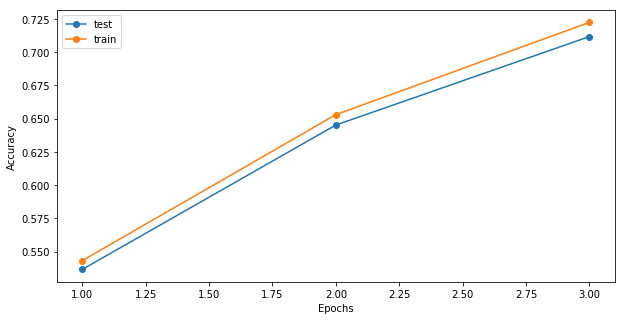

In [6]:
show_accuracy(num_epochs, model_compile.test_acc_list, model_compile.train_acc_list)

ResNet110

In [7]:
filter_num = 16
number_n = 18
weight_decay = 0.0001
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

# global_step = tf.Variable(0, trainable=False)
# lr = tf.train.exponential_decay(learning_rate = 1e-3,
#                                 global_step = global_step,
#                                 decay_steps = 1000,
#                                 decay_rate= 0.96,
#                                 staircase=True)

global_step = tf.Variable(0, trainable=False)
boundaries = [int(5000*num_classes/batch_size*60), 
              int(5000*num_classes/batch_size*120), 
              int(5000*num_classes/batch_size*160)]
values = [0.02,0.004,0.0008, 0.00016]
lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = ResNet(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filter_num=filter_num, dropout = False)

# optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

Training Model
=======

In [8]:
start_epoch = 0
end_epoch = 200
num_epochs = end_epoch-start_epoch

print('first learning rate:',sess.run(lr))
model_compile.train(start_epoch, end_epoch)
print('last learning rate:',sess.run(lr))

first learning rate: 0.01


Epoch: 1 Avg_cost: 2.8961383438110344
Test Accuracy:  0.33020000264048577
Train Accuracy:  0.33200000107288363


Epoch: 2 Avg_cost: nan
Test Accuracy:  0.09999999981373549


KeyboardInterrupt: 

Saving model
=======

In [ ]:
import time
time_now = time.strftime('%Y_%m_%d_%H_%M', time.localtime(time.time()))
SAVER_DIR = 'model'
saver = tf.train.Saver()
checkpoint_path = os.path.join(SAVER_DIR, "ResNet110_{}\ResNet110_{}".format(time_now, time_now))
saver.save(sess, checkpoint_path)

Showing accuracy graph
======

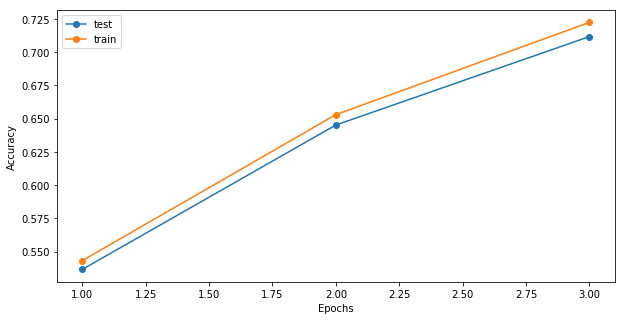

In [6]:
show_accuracy(num_epochs, model_compile.test_acc_list, model_compile.train_acc_list)